# Act Report

This report will go over the findings and insights from the We Rate Dogs data. The account rates dogs based on the images that are submitted, with scores provided in the caption. Data was also enriched by predictions dataframe - which was able to help predict if the photo was a dog & what type of dog/animal it was. The Twitter API was also used to provide favourite counts and retweet counts of the We Rate Dogs Tweets.

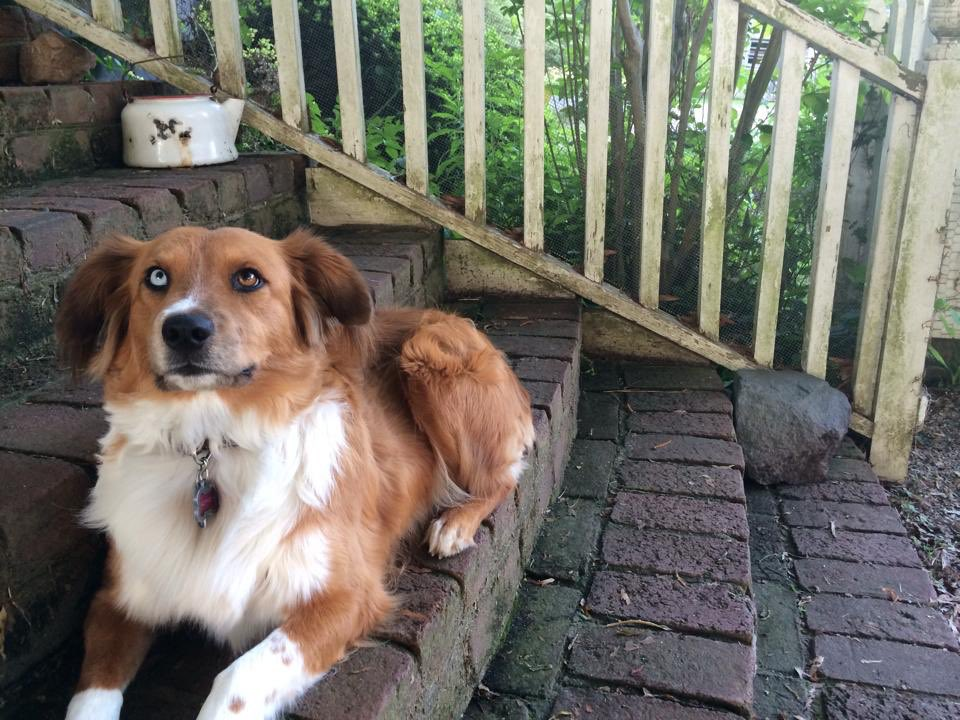

## Descriptive Statistics

In [33]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,ratings,favorite_count,retweet_count,confidence
count,1971.000000,1971.0,1971.000000,1971.000000,1971.000000,1971.000000
mean,12.223237,10.0,1.222324,8949.106545,2784.449518,0.466219
std,41.634034,0.0,4.163403,12267.799790,4697.662893,0.339608
min,0.000000,10.0,0.000000,81.000000,16.000000,0.000000
25%,10.000000,10.0,1.000000,1997.000000,628.500000,0.140969
50%,11.000000,10.0,1.100000,4147.000000,1367.000000,0.461076
75%,12.000000,10.0,1.200000,11402.500000,3239.000000,0.777087
max,1776.000000,10.0,177.600000,132810.000000,79515.000000,0.999956


The mean rating score for dogs was 12.22/10 = 1.2 ratings score, while the max was 1776/10 = 177.6 ratings score

### Ratings Distribution

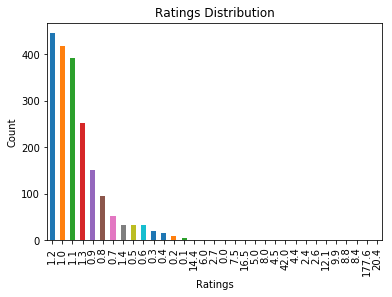

In [25]:
#plot distribution of ratings
twitter_archive_master.ratings.value_counts().plot(kind = 'bar')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count');

Most Tweets scored between 9 - 13, with 12 being the most popular rating, followed by 10, overall very high scores.

### Top Rated Dog

In [34]:
twitter_archive_master.sort_values(by=['ratings'], ascending=False).head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,ratings,favorite_count,retweet_count,jpg_url,breed,confidence
722,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,Unknown,177.6,5569,2772,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,Unknown,0.0


The below picture is the highest rated (177.6) We Rate Dogs Tweet:

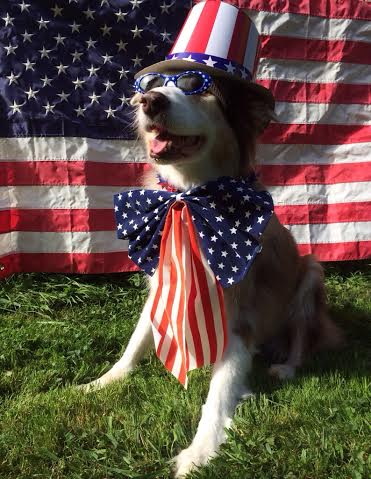

Highest rated is a dog dressed up in the American flag & was posted on the 4th of July.

### Dog Ratings by Dog Stage

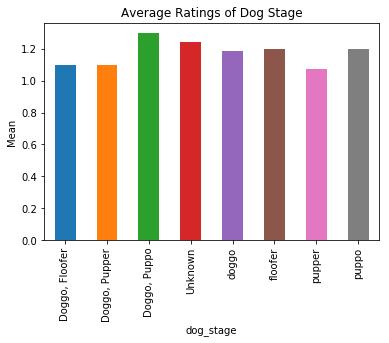

In [27]:
twitter_archive_master.groupby('dog_stage')['ratings'].mean().plot(kind = 'bar')
plt.title('Average Ratings of Dog Stage')
plt.xlabel('dog_stage')
plt.ylabel('Mean');

Doggo, Puppo has the highest average rating across the Dog Stages, ignoring unknown, with Floof & Puppo following close by.

### Relationship Between Favourite Count & Retweet Count

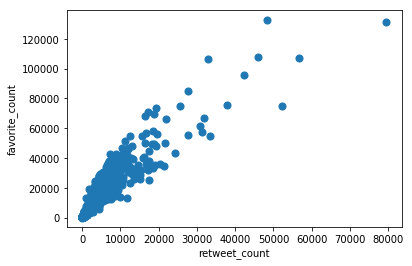

In [26]:
twitter_archive_master.plot.scatter(x = 'retweet_count', y = 'favorite_count', s = 50);

There is a strong positive relationship between favourite count and retweet count, which makes sense since higher number of retweets means that more people will see the tweet and like it.

### Dog Stage by Retweet Count

In [22]:
twitter_archive_master.groupby('dog_stage')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
"Doggo, Floofer",1.0,3433.000000,NaN,3433.0,3433.00,3433.0,3433.00,3433.0
"Doggo, Pupper",8.0,4397.250000,5383.455840,1265.0,2365.00,2543.0,3193.00,17621.0
"Doggo, Puppo",1.0,19196.000000,NaN,19196.0,19196.00,19196.0,19196.00,19196.0
Unknown,1668.0,2593.125300,3954.863172,16.0,587.25,1315.5,3117.75,56625.0
doggo,63.0,7125.698413,12868.874516,725.0,2025.50,3327.0,5422.00,79515.0
floofer,7.0,4968.714286,6163.579715,496.0,1825.00,3265.0,4436.50,18497.0
pupper,201.0,2382.502488,3584.033641,103.0,695.00,1219.0,2475.00,32883.0
puppo,22.0,6473.954545,10301.927187,716.0,1712.50,3130.0,6284.25,48265.0


Doggo, Puppo has the highest average retweet count, however it is only 1 in the dataset.

The next highest rated dog stages (apart from the unknown) is doggo & then puppo.

### Dog Stage by Favourite Count

In [23]:
twitter_archive_master.groupby('dog_stage')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
"Doggo, Floofer",1.0,17169.000000,NaN,17169.0,17169.00,17169.0,17169.00,17169.0
"Doggo, Pupper",8.0,13219.875000,12872.606889,4849.0,8206.25,9346.5,10731.75,44619.0
"Doggo, Puppo",1.0,47844.000000,NaN,47844.0,47844.00,47844.0,47844.00,47844.0
Unknown,1668.0,8527.494604,11259.281660,81.0,1689.25,3927.5,11092.00,107956.0
doggo,63.0,19356.380952,22208.483825,2593.0,8268.00,12376.0,20502.50,131075.0
floofer,7.0,13206.000000,11258.315105,2262.0,5045.50,11302.0,17721.00,33345.0
pupper,201.0,7250.527363,10743.931650,693.0,2449.00,3275.0,7842.00,106827.0
puppo,22.0,21582.090909,28034.339585,3277.0,7043.50,13387.5,19691.25,132810.0


Similar insight to the above insight, the Doggo, Puppo receives the most likes (however only one in the dataset).

With the next highest dog stages (apartment from unknown) is doggo & puppo.

Dog stages, doggo & puppo seem to be the most popular and receive the most reaction.

### Favourite Count Top 5 Dogs

In [29]:
twitter_archive_master.sort_values(by=['favorite_count'], ascending=False).head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,ratings,favorite_count,retweet_count,jpg_url,breed,confidence
306,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,1.3,132810,48265,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015
769,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,1.3,131075,79515,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333
58,879415818425184262,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,Unknown,1.3,107956,45849,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English_springer,0.383404
397,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,Unknown,1.3,107015,56625,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370
108,866450705531457537,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,1.3,106827,32883,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French_bulldog,0.905334


Top 5 dogs, based on favourite count, had ratings of 1.3. All a mixture of breeds.

The image with the most favourite was a dog support pride week:

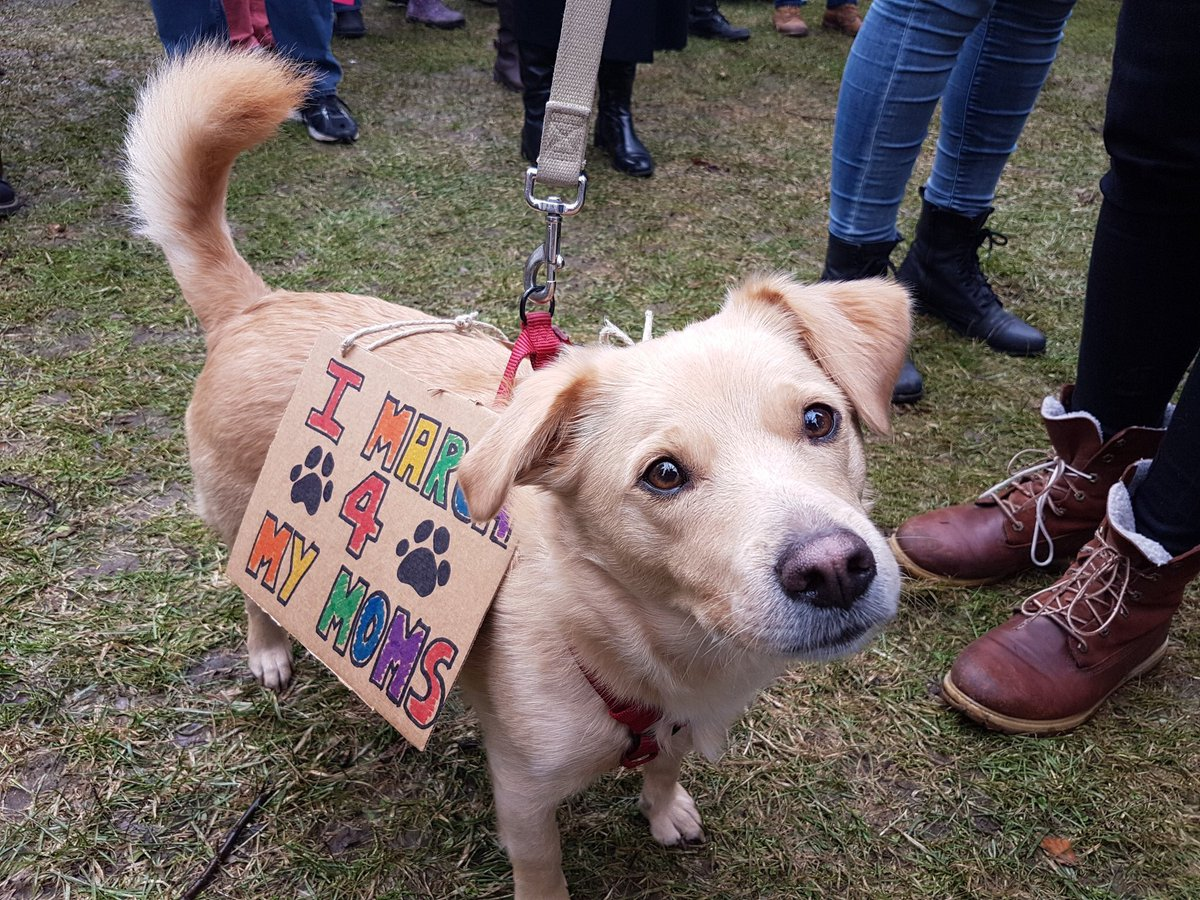

### Retweet Count Top 5 Dogs

In [30]:
twitter_archive_master.sort_values(by=['retweet_count'], ascending=False).head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,ratings,favorite_count,retweet_count,jpg_url,breed,confidence
769,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,1.3,131075,79515,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333
397,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,Unknown,1.3,107015,56625,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370
804,739238157791694849,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,1.3,75163,52360,https://pbs.twimg.com/ext_tw_video_thumb/73923...,Eskimo_dog,0.503372
306,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,1.3,132810,48265,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015
58,879415818425184262,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,Unknown,1.3,107956,45849,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English_springer,0.383404


Top 5 dogs, based on retweets also all scored 1.3, however all a different mix of breeds.

### Source of Tweets

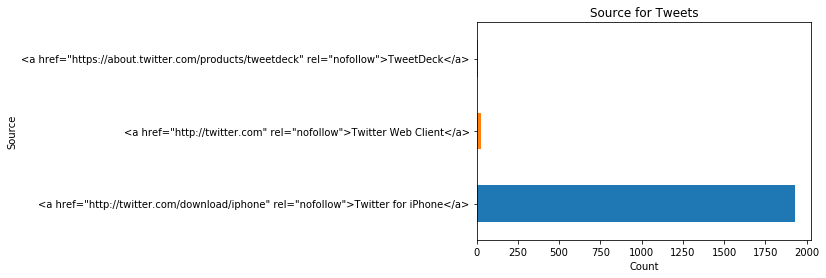

In [32]:
# Plot Distribution of Source 
twitter_archive_master.source.value_counts().plot(kind = 'barh')
plt.title('Source for Tweets')
plt.xlabel('Count')
plt.ylabel('Source');

Majority of the source of tweets came from an iphone. 

## Limitations

The data has not been statistically modelled and no significance testing was done during the analysis. This is exploratory data analysis and no conclusions can be provided, rather trends and exploratory analysis with the data.


## Insights

1) The mean rating score for dogs was 12.22/10 = 1.2 ratings score, while the max was 1776/10 = 177.6 ratings score

2) Most Tweets scored between 9 - 13, with 12 being the most popular rating, followed by 10, overall very high scores.

3) Highest rated is a dog (177.6) dressed up in the American flag & was posted on the 4th of July.


4) Doggo, Puppo has the highest average rating across the Dog Stages, ignoring unknown, with Floof & Puppo following close by.

5) There is a strong positive relationship between favourite count and retweet count, which makes sense since higher number of retweets means that more people will see the tweet and like it.

6) Doggo, Puppo has the highest average retweet count, however it is only 1 in the dataset. The next highest rated dog stages (apart from the unknown) is doggo & then puppo.

7) Similar insight to the above insight, the Doggo, Puppo receives the most likes (however only one in the dataset). With the next highest dog stages (apartment from unknown) is doggo & puppo. Dog stages, doggo & puppo seem to be the most popular and receive the most reaction.

8) Top 5 dogs, based on favourite count, had ratings of 1.3. All a mixture of breeds. The image with the most favourite was a dog support pride week.

9) Top 5 dogs, based on retweets also all scored 1.3, however all a different mix of breeds.

10) Majority of the source of tweets came from an iphone. 


## Conclusion

Dogs are rated highly out of 10 with majority of scores exceeding 10. The highest rated dog was a dog that was patriotic and wearing the American flag outfit for the 4 of July. The dog that got the most retweets was one that was marching for LGBT. There is a strong positive relationship between number of retweets and number of favourites.

Lastly, no particular kind of breed seems to be the most popular in terms of retweets and favourites.

